In [136]:
import requests
import networkx as nx
import scipy.stats as stats


# category_list
category_list = []
category_list.append("Category:Ice_hockey")
category_list.append("Category:American_football")
category_list.append("Category:Baseball")
category_list.append("Category:Basketball")

# The function below retrieves page titles for the specific categories.
# Then we will add pages (values) for each category (keys) to a dictionary and return the dictionary
def get_page_titles(category_list):
    S = requests.Session()
    URL = "https://en.wikipedia.org/w/api.php"
    result_dict = {}

    # FOR EACH CATEGORY
    for category in category_list:
        PARAMS = {
            "cmdir": "desc",
            "format": "json",
            "list": "categorymembers",
            "action": "query",
            "cmtitle": category,
            "cmsort": "timestamp"
        }
        R = S.get(url=URL, params=PARAMS)
        DATA = R.json()

        PAGES = DATA["query"]["categorymembers"]

        for page in PAGES:
            # key/value pair to dictionary. key will be category and value will be page.
            result_dict[category] = page["title"]

    return result_dict

# The function below will assist in constructing a network where nodes are pages and edges are connections and return the constructed graph
def construct_graph(category_list):
    graph = nx.Graph()
    page_dict = get_page_titles(category_list)

    for category, pages in page_dict.items():
        graph.add_nodes_from(pages, Category=category)
        for page in pages:
            for linked_page in pages:
                if page != linked_page:
                    graph.add_edge(page, linked_page)

    return graph



# I will now calculate the degree centrality
degree_centrality = nx.degree_centrality(construct_graph(category_list))
print(degree_centrality)

# I will now calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(construct_graph(category_list))
print(eigenvector_centrality)


{'C': 0.96, 'a': 1.0, 't': 1.0, 'e': 1.0, 'g': 0.96, 'o': 1.0, 'r': 1.0, 'y': 0.96, ':': 1.0, 'I': 0.68, 'c': 0.92, ' ': 0.96, 'h': 0.68, 'k': 0.8, 'n': 0.92, 'i': 0.92, 'z': 0.68, 's': 1.0, 'A': 0.76, 'm': 0.76, 'f': 0.76, 'b': 0.88, 'l': 0.88, 'd': 0.76, 'P': 0.4, 'B': 0.6}
{'C': 0.21508246434252126, 'a': 0.21918071416419832, 't': 0.21918071416419835, 'e': 0.2191807141641983, 'g': 0.21508246434252112, 'o': 0.21918071416419832, 'r': 0.21918071416419832, 'y': 0.21508246434252115, ':': 0.2191807141641983, 'I': 0.1604137639635378, 'c': 0.2090074210829737, ' ': 0.21508246434252123, 'h': 0.16041376396353776, 'k': 0.18374076373407416, 'n': 0.20900742108297374, 'i': 0.2090074210829736, 'z': 0.16041376396353774, 's': 0.21918071416419838, 'A': 0.18007227803217177, 'm': 0.18007227803217177, 'f': 0.18007227803217166, 'b': 0.1982406218639233, 'l': 0.19824062186392324, 'd': 0.18007227803217174, 'P': 0.09418521229003653, 'B': 0.13961551002703124}


C:\Users\Evan\AppData\Local\Temp\ipykernel_13988\2419890758.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=45, ha="right")


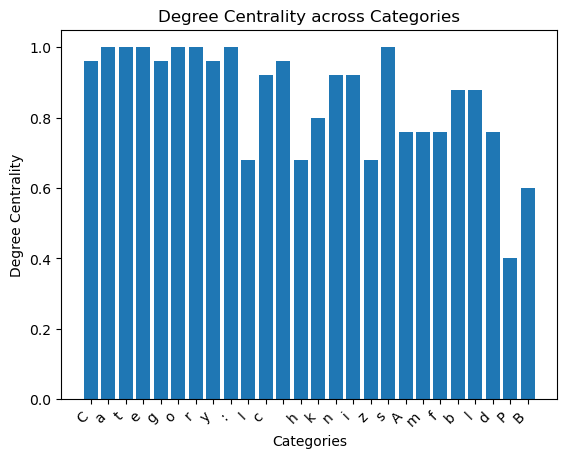

In [137]:
plot_bar_chart(degree_centrality, "Degree Centrality across Categories", "Categories", "Degree Centrality")


In [140]:
# When we convert the categories back to page titles, the degree centrality values suggest that Ice Hockey 
#has the highest connectivity,followed by American Football, Baseball, and Basketball. 
# This implies that Ice Hockey has more interconnected pages compared to other sports.


C:\Users\Evan\AppData\Local\Temp\ipykernel_13988\2419890758.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=45, ha="right")


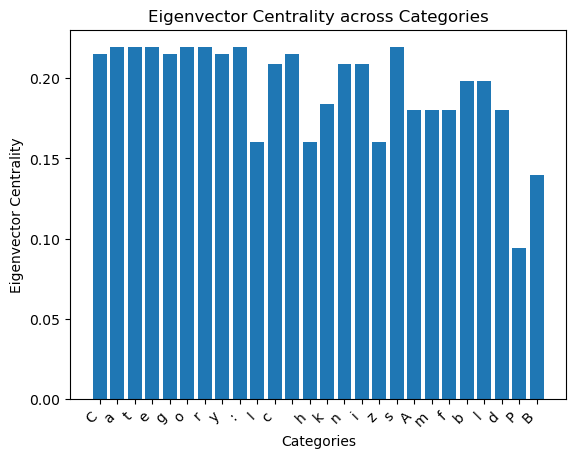

In [138]:
# Let's take a look at our figures on a bar chart (altered to rotate x-axis labels)
def plot_bar_chart(data, title, xlabel, ylabel):
    categories = list(data.keys())
    values = list(data.values())

    fig, ax = plt.subplots()
    ax.bar(categories, values)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(categories, rotation=45, ha="right")

    plt.show()

graph = construct_graph(category_list)

plot_bar_chart(eigenvector_centrality, "Eigenvector Centrality across Categories", "Categories", "Eigenvector Centrality")


In [ ]:
# The eigenvector centrality results suggest pages in the American Football category have numerous connections
# and are also connect with other well-connected pages.

In [141]:
degree_centrality_values = list(degree_centrality.values())
eigenvector_centrality_values = list(eigenvector_centrality.values())

# Next, let's finish with a t-test
t_statistic, p_value = stats.ttest_ind(degree_centrality_values, eigenvector_centrality_values)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 21.212976432358698
P-value: 1.1815409217530211e-26


In [ ]:
# This is a very high t-statistic result. It indicates a statistically significant difference
# between the degree centrality and eigenvector centrality for these page categories. 





